In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Reshape data
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train_noisy = np.expand_dims(x_train_noisy, -1)
x_test_noisy = np.expand_dims(x_test_noisy, -1)

# Build Autoencoder
input_img = Input(shape=(28, 28, 1))
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train Autoencoder
history = autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 0.2530 - val_loss: 0.1161
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - loss: 0.1150 - val_loss: 0.1080
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.1083 - val_loss: 0.1050
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.1050 - val_loss: 0.1028
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.1037 - val_loss: 0.1013
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.1018 - val_loss: 0.1004
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - loss: 0.1009 - val_loss: 0.0994
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - loss: 0.1002 - val_loss: 0.0986
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - loss: 0.0994 - val_loss: 0.0980
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - loss: 0.0988 - val_loss: 0.0976


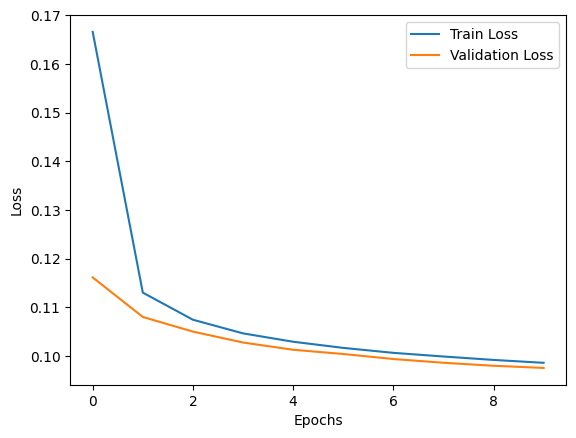

In [2]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


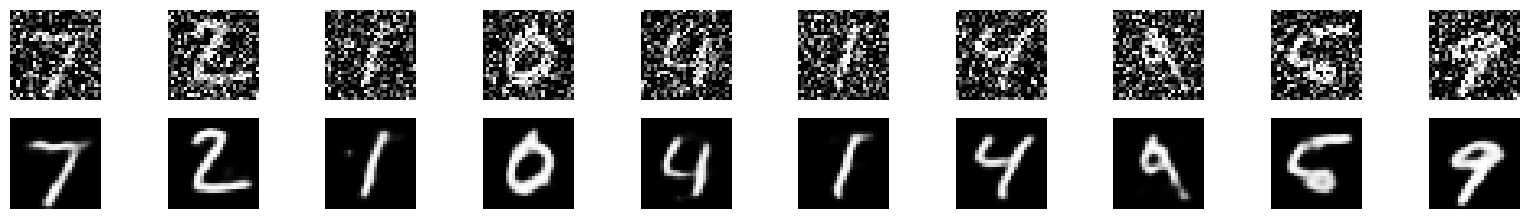

In [3]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
